<a href="FADO_QuickStartGuide-GITHUB.ipynb">pyFADO QuickGuide</a> &nbsp;&nbsp; | &nbsp;&nbsp; <a href="FADO_Part1_Execute-GITHUB.ipynb">1. Start FADO</a> &nbsp;&nbsp; | &nbsp;&nbsp; <a href="FADO_Part2_Execute-GITHUB.ipynb">2. Running FADO</a> &nbsp;&nbsp; | &nbsp;&nbsp; <a href="FADO_Part3_Plots-GITHUB.ipynb">3. Reading/Plotting FADO results</a><br><div align="right">Jean Gomes @ 2019 : jean @ iastro.pt</div>

THIS DOCUMENT CONTAINS:<br>
<div style="border:1px solid #000;">
&#9679; 2 - Running your first fit with FADO
<pre>
    | 2.1 - "Simpler" FADO output
    | 2.2 - Input file format for FADO
    | 2.3 - Other FADO options
    | 2.4 - Changing the attenuation law
    | 2.5 - Base File structure
    | 2.6 - Typical screen output from FADO: standalone run example</pre>
</div>

### &#9679; 2 - Running your first fit with FADO

In our first example, we have a galaxy in ascii format. The first column is wavelength (λ) and the second fluxes. The spectrum comes from SDSS, so it has a mean resolution of ~2 Å (FWHM). The unit factor to transform in [erg/s/cm<sup>2</sup>/Å] is 1x10<sup>-17</sup>. Then you need to feed FADO with this spectrum. See the command in the box below. Copy and paste the following command in your terminal while within the directory you have decompressed FADO.

<div style="border:1px solid #000;"><br>  ./FADO <font color="blue">-i</font> ./0266.51630.100.7xt <font color="blue">-b</font> SSPs/Base.BC03.L <font color="blue">-r</font> 2.3 <font color="blue">-u</font> 1.0e-17 <font color="blue">-d</font> 10.0<br><br></div>

or it could be invoked changing the order of the parameters as will, i.e.:

./FADO -i ./0266.51630.100.7xt -b SSPs/Base.BC03.L -r 2.3 -u 1.0e-17 -d 10.0<br>
./FADO -b SSPs/Base.BC03.L -i 0266.51630.100.7xt -u 1.0e-17 -r 2.3 -d 10.0<br>
./FADO -i ./0266.51630.100.7xt -d 10.0 -r 2.3 -u 1.0e-17 -b SSPs/Base.BC03.L<br>

<div style="width:600px; height:10px; border:0px solid #000;"><center><font color="red">
&#8942;
&#x22EE;
&vellip;
</font></center></div>

./FADO -r 2.3 -b SSPs/Base.BC03.L -u 1.0e-17 -d 10.0 -i 0266.51630.100.7xt


These produce the same output regardless of the order of the arguments :)! Remember that your code could come with a name of the following type:

* FADO_LINUX_gccX.X.X or
* FADO_MACOS_gccX.X.X

So, it is better to rename just to FADO.

The meaning is the following commands:

<b>
FADO executable: ./FADO
</b>

<b>-i</b> [input spectrum with full path]: ./0266.51630.100.7xt<br>
<b>-b</b> [Simple Stellar Population Base with full path]: SSPs/Base.BC03.L<br>
<b>-r</b> [FWHM resolution in Å]: 2.3<br>
<b>-u</b> [unit or normalization factor]: 1.0e-17<br>
<b>-d</b> [distance in Mpc]: 10.0<br>

This will produce five (5) output files:<br>

0266.51630.100.7xt.FADO_1D.fits -> One dimensional spectra<br>
0266.51630.100.7xt.FADO_EL.fits -> Emission-lines<br>
0266.51630.100.7xt.FADO_DE.fits -> Differential evolution<br>
0266.51630.100.7xt.FADO_ST.fits -> Statistics file<br>

0266.51630.100.7xt.FADO.coL.eps -> PGPLOT eps file. This is still being produced and will be kept as a legacy from the old FADO software, but it will be <b>removed</b> in the next releases. You can now use the new python routine PlotFADOv01.py for plotting (section 3). It is more flexible to create plots.<br>

FADO will also have other options if you want to change the default, i.e. change the attenuation law.

### &#9679; 2.1 - Input file format for FADO

It is advisable to fit the spectra in rest-frame. <b>IMPORTANT</b>: FADO does <b>not</b> need to have equally spaced wavelength steps and it uses a flux-conserving algorithm. FADO v1.c accepts the following formats as input files:

- <b>ASCII text file</b>: columns (<b>without tab</b>) containing at minimum the following columns: wavelength (in Angstrom) and flux density per Ångström (in arbitray units) <b>without header</b>. This can be corrected to absolute values using the -u option (see above). If you want to furnish the errors and masked pixels then two extra columns need to be furnished. Masked pixels are set different than 0. The file will look like:
<br>
<code>
[λ]     [Flux]
4330.0  41.1197701
4331.0  37.6940384
4332.0  37.5539703
4333.0  36.5070915
4334.0  34.5829620
4335.0  33.8662796
4336.0  39.6087990
4337.0  199.263794
4338.0  691.279785
4339.0  1232.27869
4340.0  1148.72095
</code>
<br>
or if want error and mask
<br>
<code>
[λ]     [Flux]      [Error]     [Mask Pixels]
4330.0  41.1197701  2.09268260  0
4331.0  37.6940384  2.05056167  0
4332.0  37.5539703  2.07151079  0
4333.0  36.5070915  2.11111140  0
4334.0  34.5829620  2.27321100  1
4335.0  33.8662796  2.55001855  1
4336.0  39.6087990  2.99041128  1
4337.0  199.263794  4.26137829  1
4338.0  691.279785  10.8294992  1
4339.0  1232.27869  19.4108067  1
4340.0  1148.72095  17.1958733  1
</code><br>

! This part is <b>deprecated</b> and will be reformulated for a better reading of FITs files soon.
- FITS one-dimensional image:
- FITS binary table

### &#9679; 2.1 - "Simpler" FADO output

In many situations you are using spectral synthesis codes aiming at having a few quantities to define/quantify the observed galaxy spectrum. The files above produced by FADO are <fb>overkilling</b> and, for general purposes, may contain way more information than what you would like to have. 

<img src="Figures/complicated_sketch_FADO.png" alt="Snow" style="width:65%;">

For instance, after running FADO you probably want just a few parameters from:

<ul>
<li><b>1 - Stellar populations</b></li><br>

* Mean stellar age (light and mass-weighted)<br>
* Mean stellar metallicity (light and mass-weighted)<br>
* Stellar mas<br>
* Extinction in the V-band<br><br>

<li><b>2 - Kinematics</b></li><br>


* Velocity dispersion<br><br>

<li><b>3 - Emission-line fluxes and equivalent-widths</b></li><br>

<b>* From a list of pre-defined emission-lines given by the user compute the fluxes & equivalent-widths. For instance, the most common lines used in the optical are:</b><br><br>

Hβ 4861Å<br>
[OIII] 5007Å<br>
Hα 6563Å<br>
[NII] 6584Å<br>
[SII] 6716,6731Å

</ul>

After you run FADO to model the observed galaxy spectrum you can just run a simple set of python scripts that are provided in section 3 to make easy plots and retrieve the minimum necessary information.

If you would like to go deeper into some details of the FADO modeling then you can check the subsections below.

### &#9679; 2.2 - Other FADO options

<b>You may want to skip this part and check it later. If that is the case, then jump to section 3, i.e. reading and plotting files.</b>

For checking other FADO options, then invoke in the terminal:

In [1]:
%%bash

./FADO -options

    ... user     : jean
    ... tight    : 20101
    ... existlock: F
    ... DELETED

♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪
♪♪♪                          Welcome to                          ♪♪♪
♪♪♪                                                              ♪♪♪
♪♪♪  Fitting Analysis using Differential evolution Optimization  ♪♪♪
♪♪♪                           FADO v1c                           ♪♪♪
♪♪♪                                                              ♪♪♪
♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪
♪♪♪                                                              ♪♪♪
♪♪♪                             .----.                           ♪♪♪
♪♪♪                           [-|.  .|-]                         ♪♪♪
♪♪♪                           [-|.\/.|-]                         ♪♪♪
♪♪♪                             \||||/                ♪♪♪        ♪♪♪
♪♪♪                              ||||                            ♪♪♪
♪♪♪             

Where you have in the first part some basic information regarding FADO:

<code>
-help      |              Help: -help                                |
-demo      |     Demonstration: -demo                                |
-license   |   License KeyType: -license                             |
-version   |   Current version: -version                             |
</code>

The -verbosity is how verbose you want FADO to be in the output screen while running.

The other options correspond to:


<b>Still to be completed!</b>

### &#9679; 2.3 - Changing the attenuation law

You may want to fit a galaxy with a different attenuation-law from the FADO default <a href="https://ui.adsabs.harvard.edu/abs/2000ApJ...533..682C/abstract">Calzetti et al. (2000)</a> attenuation law. It is important to be aware that in FADO the attenuation law is assumed as a uniform dust screen. In case you would like to have something more elaborate you should use a radiative dust transfer code. 

Additionally, there are significant differences whether the stars and dust are homogeneously distributed or the dust is in front of foreground stars, i.e. uniform dust screen. We also can envisage different geometrical distributions of stars and dust.

In order to know the attenuation laws available in FADO you can just type:

In [2]:
%%bash

./FADO -elaws

    ... user     : jean
    ... tight    : 20101
    ... existlock: F
    ... DELETED

♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪
♪♪♪                          Welcome to                          ♪♪♪
♪♪♪                                                              ♪♪♪
♪♪♪  Fitting Analysis using Differential evolution Optimization  ♪♪♪
♪♪♪                           FADO v1c                           ♪♪♪
♪♪♪                                                              ♪♪♪
♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪
♪♪♪                                                              ♪♪♪
♪♪♪                             .----.                           ♪♪♪
♪♪♪                           [-|.  .|-]                         ♪♪♪
♪♪♪                           [-|.\/.|-]                         ♪♪♪
♪♪♪                             \||||/                ♪♪♪        ♪♪♪
♪♪♪                              ||||                            ♪♪♪
♪♪♪             

So, you can see in the FADO output the <b>14</b> attenuation laws provided in this version. You can choose the most suitable for your purposes by invoking the command as in section 2.1, but including the -e option and the corresponding code for the attenuation law. 

For instance, if you would like to fit a given galaxy with the <a href="https://ui.adsabs.harvard.edu/abs/1986AJ.....92.1068F/abstract">Fitzpatrick (1986)</a> attenuation curve for the Large Magellanic Cloud, then you have to type:<br><br>

<div style="border:1px solid #000;"><br>  ./FADO <b>-i</b> ./0266.51630.100.7xt <b>-b</b> SSPs/Base.BC03.L <b>-r</b> 2.3 <b>-u</b> 1.0e-17 <b>-d</b> 10.0 <b>-e</b> FLMC<br><br></div><br>

<b>Remember that each attenuation law has its wavelength range of validity and it corresponds to an average curve for galaxies.</b> See below the corresponding articles:<br>

- <b>ALLR</b>: Allen (1976) for the Milky Way
- <b>CAFR</b>: Charlot and Fall (2000) relation with μ = 0.3
- <b>CAFR</b>: Charlot and Fall (2000) relation for the diffuse ISM component (-0.7)
- <b>CALR</b>: Calzetti et al. (2000)
- <b>CALE</b>: Calzetti et al. (2000) extrapolated to the far-UV
- <b>CCMR</b>: Clayton, Cardelli & Mathis (1989)
- <b>FLMC</b>: Fitzpatrick (1986) for the Large Magellanic Cloud
- <b>GOR1</b>: Gordon et al. (2003) - Small Magellanic Cloud Bar
- <b>GOR2</b>: Gordon et al. (2003) - Large Magellanic Cloud SuperShell
- <b>GOR3</b>: Gordon et al. (2003) - Large Magellanic Cloud Average
- <b>H83R</b>: Howarth (1983) - Galactic law
- <b>OD94</b>: O'Donnell (1994) - Essentially CCMR with diff. optical coefficients
- <b>PREV</b>: Prevot et al. (1984) & Bouchet et al. (1985) for the Small Magellanic Cloud
- <b>SFMW</b>: Seaton (1979) plus Fitzpatrick (1986) for the Milky Way

You can see below some of the attenuation curves from above.

In [3]:
# Import libraries for this notebook
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
from cycler import cycler

# Plot different extinction curves from FADO

# First read the ascii file
# Deprecated
#num_lines = sum(1 for line in open('EvalRedTerm_Jupyter.lst'))

num_lines = len( open('EvalRedTerm_Jupyter.lst').readlines() )

# Open ascii file
# This is just to read a file. Not very clever the way being done here!
d = open('EvalRedTerm_Jupyter.lst', 'r')

O_lambda = np.zeros((num_lines))
q_matrix = np.zeros((14,num_lines))

for i in enumerate(d):
    #print(i[0])
    
    rows = i[1].strip()
    cols = rows.split()
     #print(np.array(cols).size)
        
    l = cols[0]
    O_lambda[i[0]] = l 
    
    q_vec = np.zeros((14))
    for j in enumerate(range(np.array(cols).size-1)):
        q = cols[j[0]+1]
        q_vec[j[0]] = q
    
    q_matrix[:,i[0]] = q_vec[:]
        
d.close()

print(O_lambda.shape,O_lambda.size)
print(q_matrix.shape,q_matrix.size)

(8001,) 8001
(14, 8001) 112014


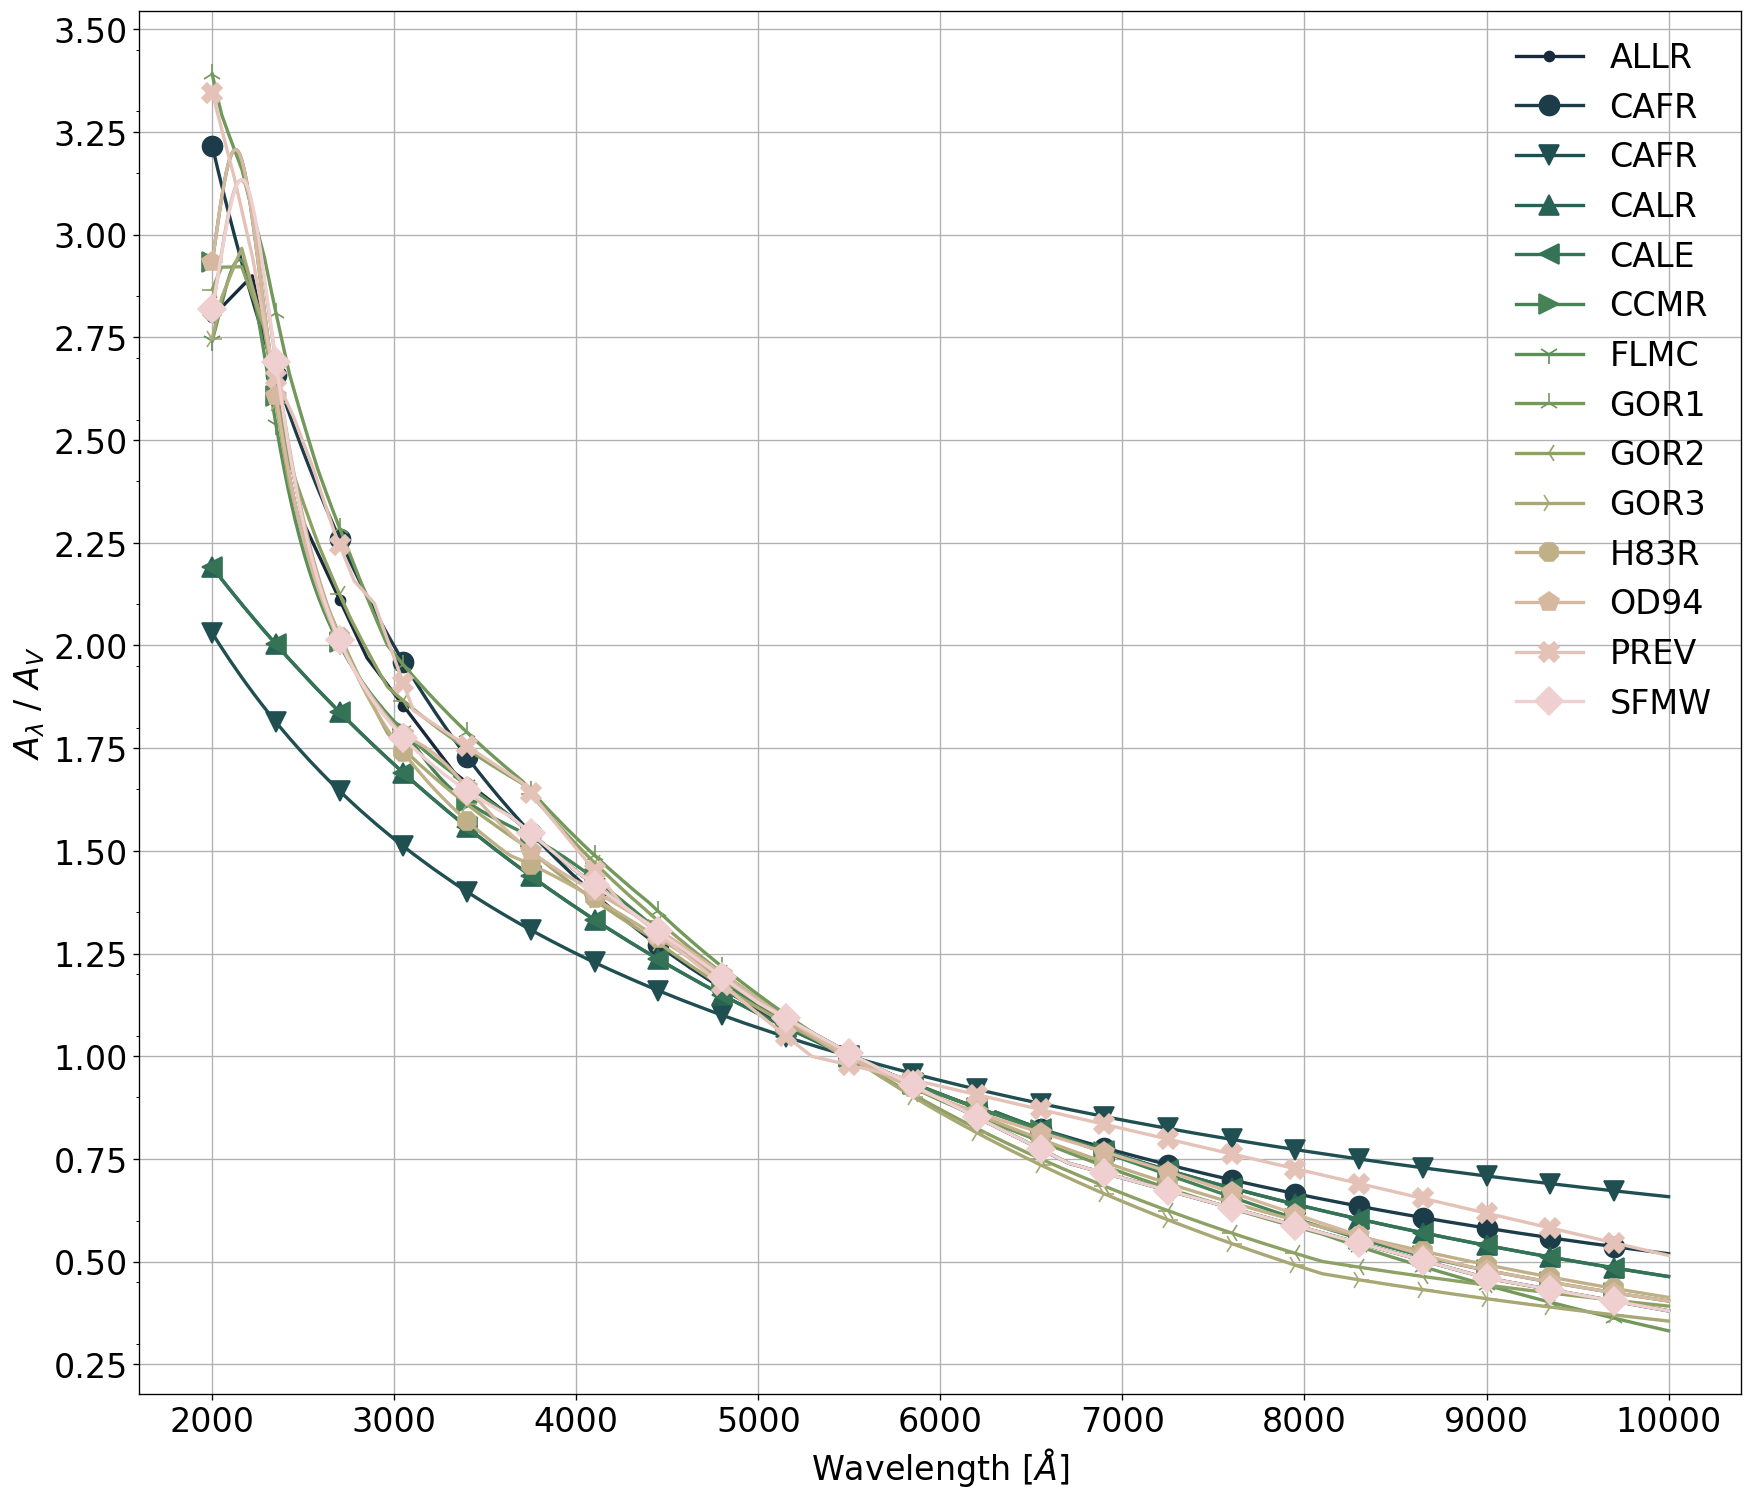

In [4]:
# Plot extinction curves

Figure = plt.figure( figsize=(15,12),dpi=120,facecolor='w',edgecolor='w' )
plt.subplots_adjust( bottom=.02, left=.06, right=.95, top=.98, wspace=0.0, hspace=0.0 ) 
   
plt.rc( 'font', size=20 )
    
Ny = 15
Nx = 10
    
ax = plt.subplot(111)
    
# This is being done by hand, but it could be read in the Base file
Elaws = [ 'ALLR', 'CAFR', 'CAFR', 'CALR', 'CALE', 'CCMR', 'FLMC', 'GOR1', 'GOR2', 'GOR3', 'H83R', 'OD94', 'PREV', 'SFMW' ]
Emark = [ '.'   , 'o'    , 'v'   , '^'    , '<'    , '>'    , '1'    , '2'    , '3'    , '4'    , '8'    , 'p'    , 'X'    , 'D' ]

#csns = sns.cubehelix_palette( len(Elaws), start=0.5, rot=0, dark=0, light=.75, reverse=True )
#csns = sns.color_palette("husl", len(Elaws))
csns = sns.cubehelix_palette( len(Elaws), start=.1, rot=-.85, reverse=True )

## Plotting spectra
for i in range(14):
    plabel = str(Elaws[i])
    pmarks = str(Emark[i])
    Plot_1, = plt.plot(O_lambda, q_matrix[i,:], marker=pmarks, markersize=12, markevery=350, color=csns[i], linewidth=2.0, label=plabel)

ax.set_xscale('linear')
ax.legend(loc='upper right', frameon=False)
    
ax.xaxis.set_major_locator(plt.MaxNLocator(Nx))
ax.xaxis.set_minor_locator(plt.MaxNLocator(Nx))
ax.yaxis.set_major_locator(plt.MaxNLocator(Ny))
ax.yaxis.set_minor_locator(plt.MaxNLocator(Ny*2))
    
#ax.axis("off")
ylabel(r"$A_\lambda$ / $A_V$")
xlabel(r"Wavelength [$\AA$]")
ax.grid()

The curves are very similar in the optical range starting to deviate more in the UV and infrared. We can also take a look at the division of the curves in comparison to <a href="https://ui.adsabs.harvard.edu/abs/2000ApJ...533..682C/abstract">Calzetii et al. (2000)</a>.

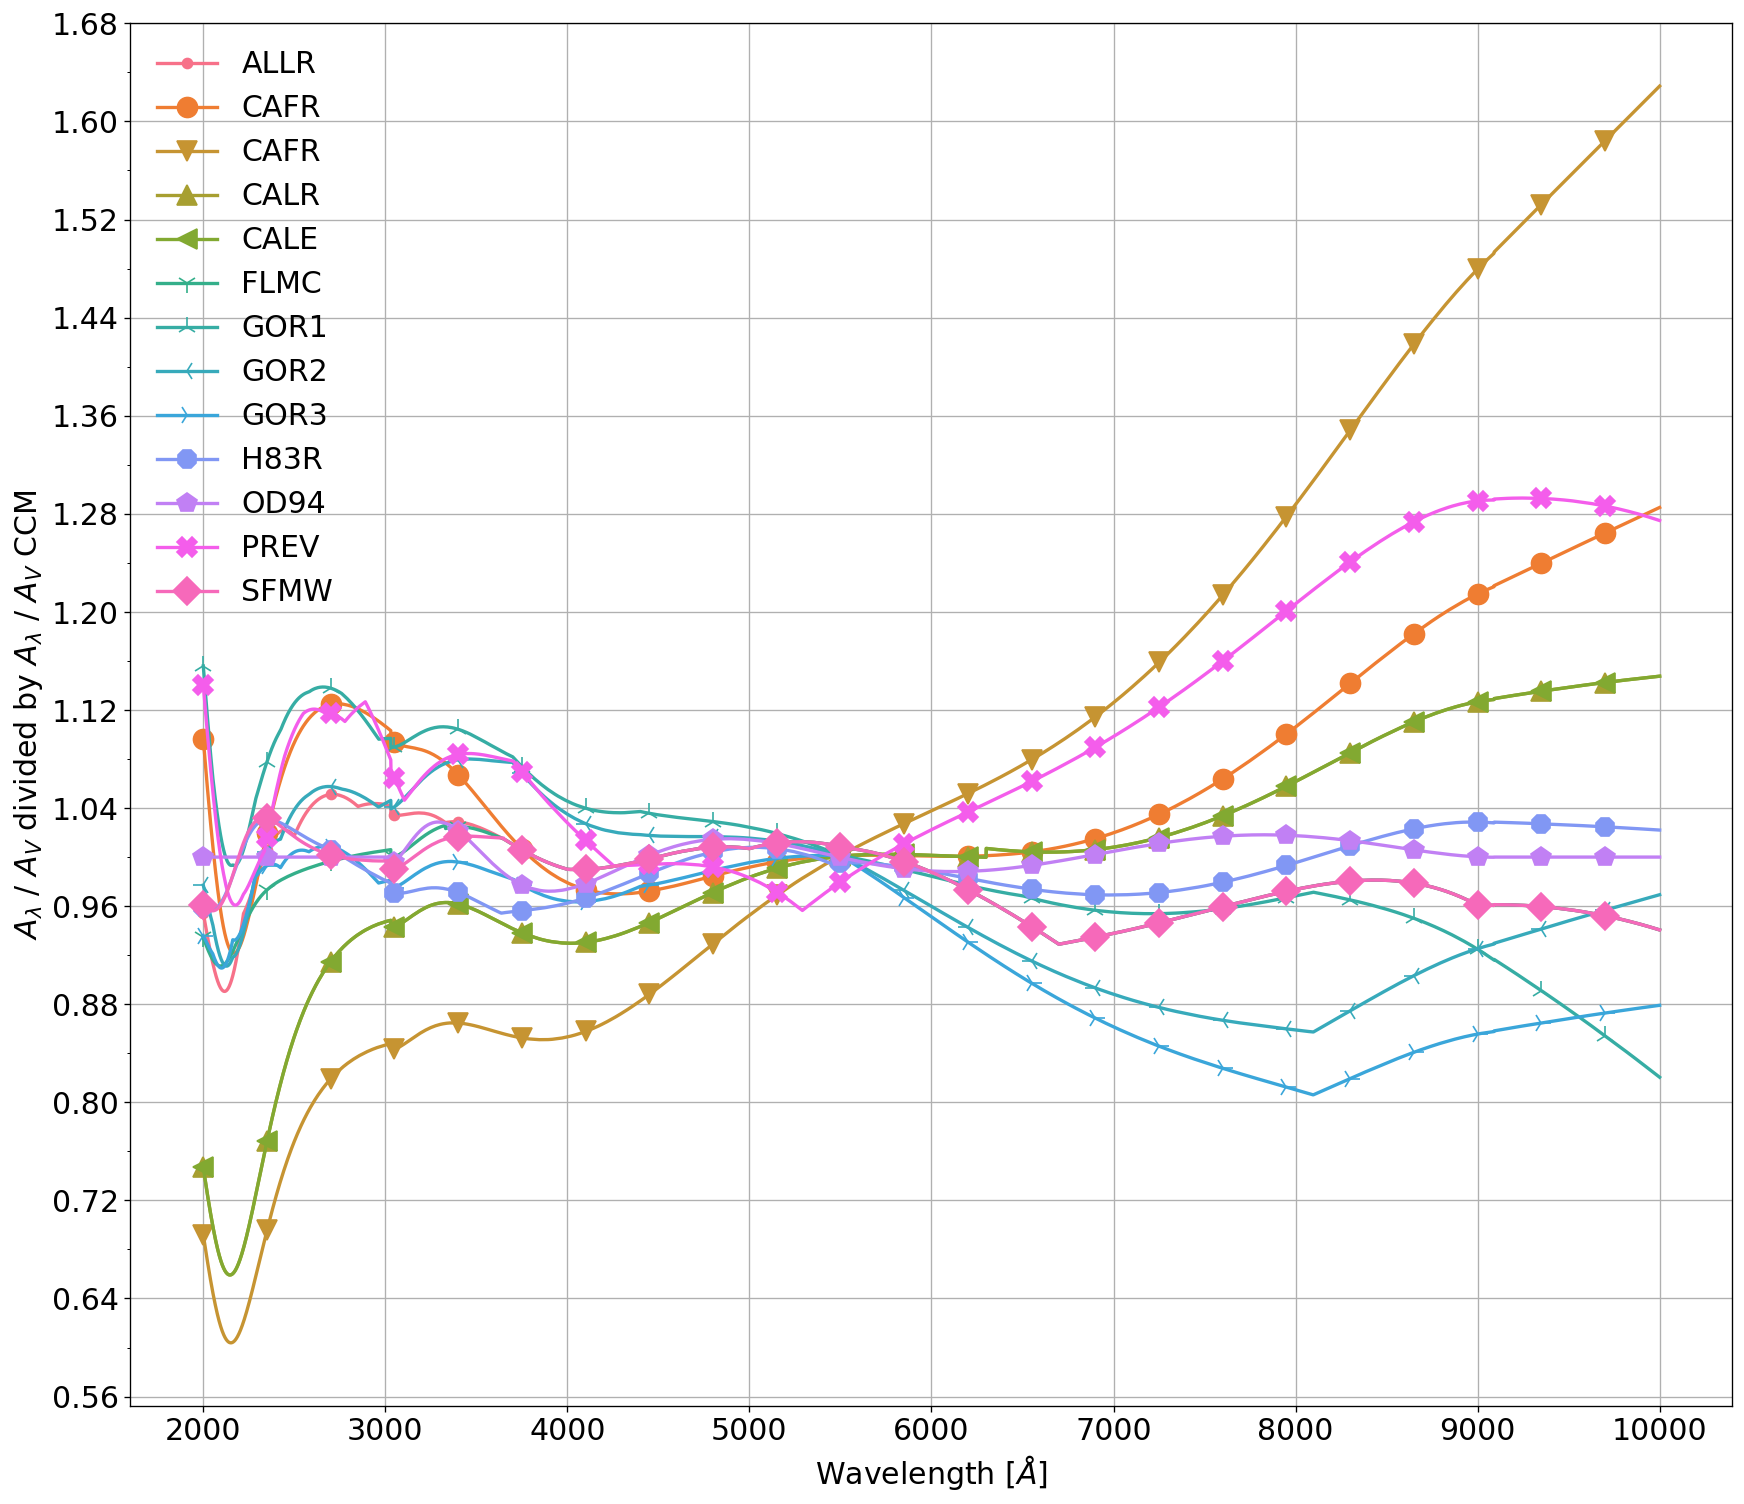

In [5]:
Figure = plt.figure( figsize=(15,12),dpi=120,facecolor='w',edgecolor='w' )
plt.subplots_adjust( bottom=.02, left=.06, right=.95, top=.98, wspace=0.0, hspace=0.0 ) 
   
plt.rc( 'font', size=18 )
    
Ny = 15
Nx = 10
    
ax = plt.subplot(111)
    
# This is being done by hand, but it could be read in the Base file
Elaws = [ 'ALLR', 'CAFR', 'CAFR', 'CALR', 'CALE', 'CCMR', 'FLMC', 'GOR1', 'GOR2', 'GOR3', 'H83R', 'OD94', 'PREV', 'SFMW' ]
Emark = [ '.'   , 'o'    , 'v'   , '^'    , '<'    , '>'    , '1'    , '2'    , '3'    , '4'    , '8'    , 'p'    , 'X'    , 'D' ]

#csns = sns.cubehelix_palette( len(Elaws), start=0.5, rot=0, dark=0, light=.75, reverse=True )
csns = sns.color_palette("husl", len(Elaws))
#csns = sns.cubehelix_palette( len(Elaws), start=.1, rot=-.85, reverse=True )

## Plotting spectra
ic = 5
for i in range(14):
    if i!=ic:
        plabel = str(Elaws[i])
        pmarks = str(Emark[i])
        Plot_1, = plt.plot(O_lambda, q_matrix[i,:]/q_matrix[ic,:], marker=pmarks, markersize=12, markevery=350, color=csns[i], linewidth=2.0, label=plabel)

ax.set_xscale('linear')
ax.legend(loc='upper left', frameon=False)
    
ax.xaxis.set_major_locator(plt.MaxNLocator(Nx))
ax.xaxis.set_minor_locator(plt.MaxNLocator(Nx))
ax.yaxis.set_major_locator(plt.MaxNLocator(Ny))
ax.yaxis.set_minor_locator(plt.MaxNLocator(Ny*2))
    
#ax.axis("off")
ylabel(r"$A_\lambda$ / $A_V$ divided by $A_\lambda$ / $A_V$ CCM")
xlabel(r"Wavelength [$\AA$]")
ax.grid()

### &#9679; 2.2 - Base File Structure

<b>You may want to skip this part check it later.</b> If that is the case, then jump to subsection 2.4. below or directly to sheed containing section 3.

In the example above we have used the base file Base.BC03.L that is distributed with the format read by FADO. You can also download it from here. These SSPs are from Bruzual & Charlot (2003). If you want to understand the structure of the base file. Take a look below, otherwise if you want to go to the plots and check this later then you can jump this subsection 2.1.

Let us take a look inside this file:


In [6]:
%%bash

more SSPs/Base.BC03.L

::::::::::::::
SSPs/Base.BC03.L
::::::::::::::
100            [N_base]
bc2003_hr_m42_chab_ssp_020.spec          0.00100e9      0.00400     age020_m42      1.0000     0     0.0000
bc2003_hr_m42_chab_ssp_036.spec          0.00209e9      0.00400     age036_m42      1.0000     0     0.0000
bc2003_hr_m42_chab_ssp_045.spec          0.00316e9      0.00400     age045_m42      0.9999     0     0.0000
bc2003_hr_m42_chab_ssp_055.spec          0.00501e9      0.00400     age055_m42      0.9488     0     0.0000
bc2003_hr_m42_chab_ssp_061.spec          0.00661e9      0.00400     age061_m42      0.9220     0     0.0000
bc2003_hr_m42_chab_ssp_067.spec          0.00871e9      0.00400     age067_m42      0.8983     0     0.0000
bc2003_hr_m42_chab_ssp_070.spec          0.01000e9      0.00400     age070_m42      0.8862     0     0.0000
bc2003_hr_m42_chab_ssp_078.spec          0.01445e9      0.00400     age078_m42      0.8571     0     0.0000
bc2003_hr_m42_chab_ssp_090.spec          0.02512e9      0.00400  

<br>The structure of the base file is the following:

First line contains the number of Simple Stellar Population (SSP) models. In this case 100 SSPs.

<table style="width:100%">
  <tr>
    <th><b>1st column</b></th>
    <th><b>2nd column</b></th>
    <th><b>3rd column</b></th>
    <th><b>4th column</b></th>
    <th><b>5th column</b></th>
  </tr>
  <tr>
    <th>SSP spectrum</th>
    <th>Age [years]</th>
    <th>Metallicity [Z - Mass fraction]</th>
    <th>SSP code name</th>
    <th>Mass fraction remaining</th>
  </tr>
</table>

Let us plot one of this SSP spectrum, the bc2003_hr_m62_chab_ssp_045.spec model. It is of 0.00316e9 years and with metallicity 0.02000. The SSP code name is age045_m62 and has a mass fraction remaining of 0.9858, i.e. 

In [7]:
print("Mass fraction returned to the interstellar medium due to stellar evolution (e.g., winds): {:f}".format(1-0.9858))

Mass fraction returned to the interstellar medium due to stellar evolution (e.g., winds): 0.014200


<br>
The following code is to plot the spectra from Base.BC03.L

In [8]:
# Open base file in ascii format
f = open('SSPs/Base.BC03.L', 'r')

# Read 1st line with number of SSP models
line1 = f.readline()
line1_split = line1.split()
Num_base = int(line1_split[0])
print("Number of SSP models: {}".format(Num_base))
#print("Type: {}".format(type(Num_base)))

# Loop over lines and extract variables of interest
for line in enumerate(f):
    c = int(line[0])
    if c < Num_base:
        rows    = line[1].strip()
        columns = rows.split()
        name    = columns[0]
        tage    = float(columns[1])
        Zmet    = float(columns[2])
        code    = columns[3]
        mass    = float(columns[4])
        if name == 'bc2003_hr_m62_chab_ssp_045.spec':
            print("{:s} Age: {:5.3f} Myr and metallicity {:5.3f}".format(name,tage/1.e6,Zmet,code,mass) )
            break
f.close()

Number of SSP models: 100
bc2003_hr_m62_chab_ssp_045.spec Age: 3.160 Myr and metallicity 0.020


This is just to read the elements of the Base and plot below.

In [9]:
# Open base file in ascii format
# This is just to read a file. Not very clever the way being done here!
d = open('SSPs/Base.BC03.L', 'r')

line1 = d.readline()
line1_split = line1.split()
Num_base = int(line1_split[0])
#print(Num_base)

# Loop over lines and extract variables of interest
for base in enumerate(d):
    c = int(base[0])
    #print('c',c,base[1])
    #if c < Num_base:
    if c < Num_base:
        rows_base    = base[1].strip()
        columns_base = rows_base.split()
        name_base    = columns_base[0]
        tage_base    = float(columns_base[1])
        Zmet_base    = float(columns_base[2])
        code_base    = columns_base[3]
        mass_base    = float(columns_base[4])
    
        # Open base spectrum
        path = 'SSPs/' + name_base
        b = open(path, 'r')
        
        x = np.zeros(shape=(2,1))
        y = np.zeros(shape=(2,1))
        
        #print(x,y)
        j = 0
        for line in enumerate(b):
            if line[1][0] != '#':
                rows    = line[1].strip()
                columns = rows.split()
                
                # Extremelly slow to run this part, but for showing purposes                
                #print(columns)
                
                x[0][:] = float(columns[0])
                x[1][:] = float(columns[1])
                
                #print(j)
                if j == 0 :
                    y[0][:] = x[0][:]
                    y[1][:] = x[1][:]
                else:
                    y = np.append(y,x,axis=1) 
                
                j += 1
        
        if c == 0:
            f = np.empty(shape=(Num_base,2,np.size(y[0][:])))
            print(f.shape)
            f[c][:][:] = y[:][:]
        else:
            #print(c)
            f[c][:][:] = y[:][:]
       
print(x.shape,f.shape)
#print(f[0][0][0])
    
l  = np.array(f[0][0][:])
ff = np.empty(shape=(Num_base,np.size(l)))
for c in range(Num_base):
    ff[c,:] = np.log10(abs(f[c][1][:])+1.0e-60)
    
d.close()

(100, 2, 6900)
(2, 1) (100, 2, 6900)


Plotting the Simple Stellar Population Base elements. This is illustrative example on how the stellar populations vary as a fucntion of age and metallicity nearly in the optical range.

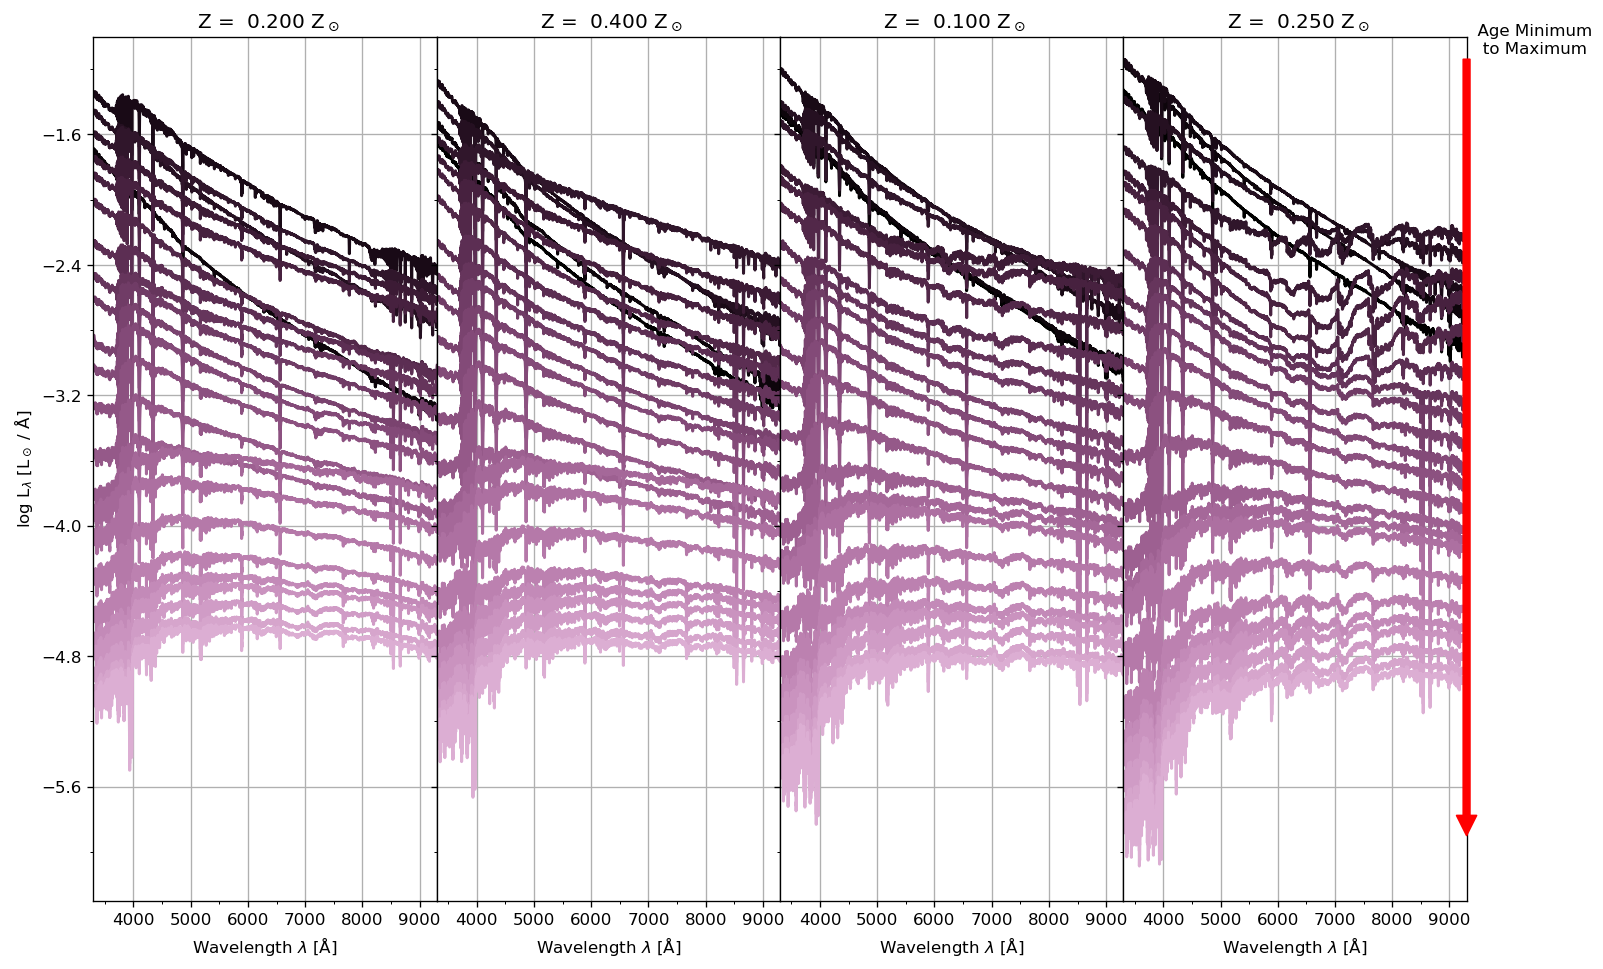

In [10]:
Figure = plt.figure( figsize=(15,12),dpi=120,facecolor='w',edgecolor='w' )
plt.subplots_adjust( bottom=.02, left=.06, right=.95, top=.98, wspace=0.0, hspace=0.0 ) 
   
plt.rc( 'font', size=10 )
    
Ny = 8
Nx = 6
    
ax = plt.subplot(111)
    
# This is being done by hand, but it could be read in the Base file
Z_grid = [ 0.004, 0.008, 0.002, 0.005 ]

# Sequential palette of colors
csns = sns.cubehelix_palette( 25, start=0.5, rot=0, dark=0, light=.75, reverse=True )

xmin = 3300.0        ; xmax = 9300.0
ymin = -6.3          ; ymax = -1.0

########## Column 1
ax1 = subplot2grid( (24,28), (0,0), colspan=6, rowspan=15 )
ax1.axis('on')

ax1.set_prop_cycle( cycler('color', csns) )

ax1.set_xlim( xmin,xmax )
ax1.set_ylim( ymin,ymax )

ax1.xaxis.set_major_locator(plt.MaxNLocator(Nx))
ax1.xaxis.set_minor_locator(plt.MaxNLocator(Nx*2))
ax1.yaxis.set_major_locator(plt.MaxNLocator(Ny))
ax1.yaxis.set_minor_locator(plt.MaxNLocator(Ny*2))

for c in range(25):
    plot1, = plt.plot( l, ff[c,:], linewidth=1.8 )
    
ax1.set( xlabel=r'Wavelength $\lambda$ [Å]', ylabel='log L$_\lambda$ [L$_\odot$ / Å]',title=r' Z = % 5.3f Z$_\odot$' % (Z_grid[0]/0.02) )
ax1.grid()

########## Column 2
ax2 = subplot2grid( (24,28), (0,6), colspan=6, rowspan=15 )
ax2.axis('on')

# Sequential palette of colors
ax2.set_prop_cycle( cycler('color', csns) )

ax2.set_xlim( xmin,xmax )
ax2.set_ylim( ymin,ymax )

# Turn off tick labels
ax2.set_yticklabels([])
#ax2.set_xticklabels([])

ax2.xaxis.set_major_locator(plt.MaxNLocator(Nx))
ax2.xaxis.set_minor_locator(plt.MaxNLocator(Nx*2))
ax2.yaxis.set_major_locator(plt.MaxNLocator(Ny))
ax2.yaxis.set_minor_locator(plt.MaxNLocator(Ny*2))

for c in range(25):
    plot2, = plt.plot( l, ff[c+25,:], linewidth=1.8 )
    
ax2.set( xlabel=r'Wavelength $\lambda$ [Å]',title=r' Z = % 5.3f Z$_\odot$' % (Z_grid[1]/0.02) )
ax2.grid()

########## Column 3
ax3 = subplot2grid( (24,28), (0,12), colspan=6, rowspan=15 )       #sets the position and size of the panel for Plot #01
ax3.axis('on')

# Sequential palette of colors
ax3.set_prop_cycle( cycler('color', csns) )

ax3.set_xlim( xmin,xmax )
ax3.set_ylim( ymin,ymax )

# Turn off tick labels
ax3.set_yticklabels([])
#ax2.set_xticklabels([])

ax3.xaxis.set_major_locator(plt.MaxNLocator(Nx))
ax3.xaxis.set_minor_locator(plt.MaxNLocator(Nx*2))
ax3.yaxis.set_major_locator(plt.MaxNLocator(Ny))
ax3.yaxis.set_minor_locator(plt.MaxNLocator(Ny*2))

for c in range(25):
    plot3, = plt.plot( l, ff[c+50,:], linewidth=1.8 )

ax3.set( xlabel=r'Wavelength $\lambda$ [Å]',title=r' Z = % 5.3f Z$_\odot$' % (Z_grid[2]/0.02) )
ax3.grid()

########## Column 4
ax4 = subplot2grid( (24,28), (0,18), colspan=6, rowspan=15 )       #sets the position and size of the panel for Plot #01
ax4.axis('on')

# Sequential palette of colors
ax4.set_prop_cycle( cycler('color', csns) )

xmin = 3300.0        ; xmax = 9300.0
ymin = -6.3          ; ymax = -1.0

ax4.set_xlim( xmin,xmax )
ax4.set_ylim( ymin,ymax )

# Turn off tick labels
ax4.set_yticklabels([])
#ax2.set_xticklabels([])

ax4.xaxis.set_major_locator(plt.MaxNLocator(Nx))
ax4.xaxis.set_minor_locator(plt.MaxNLocator(Nx*2))
ax4.yaxis.set_major_locator(plt.MaxNLocator(Ny))
ax4.yaxis.set_minor_locator(plt.MaxNLocator(Ny*2))

y1_arrow = -5.9
y2_arrow = -1.1

for c in range(25):
    plot4, = plt.plot( l, ff[c+75,:], linewidth=1.8 )

ax4.annotate('  Age Minimum\n   to Maximum', xy = (9300.0, y1_arrow), xytext = (9300., y2_arrow), 
             arrowprops={'color': 'red'})

ax4.set( xlabel=r'Wavelength $\lambda$ [Å]',title=r' Z = % 5.3f Z$_\odot$' % (Z_grid[3]/0.02) )
ax4.grid()

plt.show()

### &#9679; 2.4 - Typical screen output from FADO: standalone run example

If you want to scroll down you can see the full output of one single run from FADO.


In [11]:
%%bash

more output

::::::::::::::
output
::::::::::::::
    ... user     : jean
    ... tight    : 20101
    ... existlock: F
    ... DELETED

♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪
♪♪♪                          Welcome to                          ♪♪♪
♪♪♪                                                              ♪♪♪
♪♪♪  Fitting Analysis using Differential evolution Optimization  ♪♪♪
♪♪♪                           FADO v1c                           ♪♪♪
♪♪♪                                                              ♪♪♪
♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪♪
♪♪♪                                                              ♪♪♪
♪♪♪                             .----.                           ♪♪♪
♪♪♪                           [-|.  .|-]                         ♪♪♪
♪♪♪                           [-|.\/.|-]                         ♪♪♪
♪♪♪                             \||||/                ♪♪♪        ♪♪♪
♪♪♪                              ||||           